# Project 1: Disruption problem
# Students: Khair Mohamed - El Firdoussi Aymane - Msik Ahmed Amine


# Introduction

In this paper, we will introduce stochastic processes in continuous time.  The aim of this study is to introduce a few properties about Poisson processes and to provide the basics to deal with such processes in the case where there is a change of intensity. This a very frequent situation. For example, take an insurance company, the total number of laims to an insurance can be modelled by a counting process. Thus, if an event occur, like a global pandemic, at one point of time, one can observe a change of intensity in the Poisson process. Our final goal is to predict this point of time.

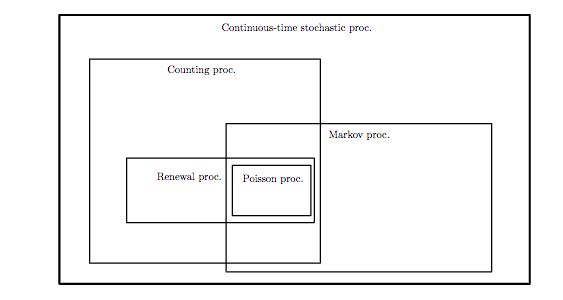

# Preparatory work and Assumptions

Imagine that we have events we describe by a point process 𝑁. At the beginning of the observation, events occur according to a Poisson process intensity 𝜆0 until a time 𝜏 and then switch to a new regime which is still a Poisson process but with intensity 𝜆1. We suppose that we know 𝜆0 and 𝜆1 but not 𝜏. We still know that 𝜏 follows an exponential distribution of parameter 𝜎. We want to estimate 𝜏 by the observation of a single trajectory.

# Question 1:

Using the last question in the exercise 2.5.6, we have that the dynamics of $\hat{Z}$ between two jumps $T_n$ and $T_{n + 1}$, which are also the jumps of the process N, is given by:

$$ \hat{Z}(t) = \hat{Z}(T_n) + \int_{T_n}^t (h(s) - (\lambda_1 - \lambda_0) \hat{Z}(s)) (1 - \hat{Z}(s)) ds $$ 

$$ \hat{Z}(T_n) = \hat{Z}(T_n^-) + \frac{(\lambda_1 - \lambda_0)\hat{Z}(T_n^-)(1 - \hat{Z}(T_n^-))}{\lambda_0 + (\lambda_1 - \lambda_0) \hat{Z}(T_n^-)} $$

# Question 2:

Given a counting process N and its sequence of jump times (Tn)n≥0, we call

$$ \xi_n = T_{n + 1} - T_n $$

the inter-arrival times of N. Then, Let λ > 0. A Poisson process with intensity λ is a counting process with stationary and independent increments such that

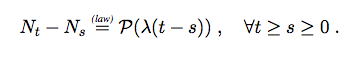

We will generate poisson processes in this study thanks to its definition and the generation of exponential laws as a Poisson process with intensity λ is a counting process whose sequence of inter-arrival times is i.i.d. with law exponential of parameter λ.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

# All imports go here

In [2]:
# Generating a Poisson process of intensity lambda
def poisson_process(t, n, lam):
    """
    n: is the total number of jump times to generate
    lam : the intensity of the Poisson process
    
    """
    # generating the inter-arrivals
    xi = np.random.exponential(scale = 1 / lam, size = n)
    
    # computing the jumpt times
    T = np.zeros(n + 1)
    T[1] = xi[0]
    
    for i in range(1, n):
        T[i + 1] = T[i] + xi[i]
        
    # Now that we have the jump times, we compute the value of the Poisson process in t
    N = np.sum(T <= t)
    
    return T, N

In [3]:
T, N = poisson_process(20, 100, 2)
print(N)

41


In this study, we recall that we consider two independent Poisson processes with respective intensities 𝜆0 and 𝜆1. Initially, we only observe the first one, and after a random instant τ, independent of the two processes, we observe the second one. This means that we observe a punctual process N whose intensity undergoes a sudden change: there exists a random time τ. We use our function poisson_process to generate our point process.

In [4]:
def point_process(lam0, lam1, tau, n):
    # T is the jump times process
    T = [0]
    xi = np.random.exponential(scale = 1 / lam0)
    t = xi
    while t < tau:
        T.append(t)
        t += np.random.exponential(scale = 1 / lam0)
    
    t = tau
    for i in range(n):
        t += np.random.exponential(scale = 1 / lam1)
        T.append(t)
    
    return T

In [5]:
def poisson(T, t):
    return np.sum(np.array(T) <= t)


### Plotting a sample point process

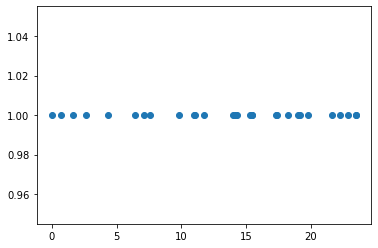

In [89]:
# Parameters
lam0 = 1
lam1 = 2
n = 20
tau_ = 10

T_ = point_process(lam0, lam1, tau_, n)
# Plotting
plt.scatter(T_, np.ones(len(T_)))
plt.show()

## Plotting a sample path of the Poisson process N

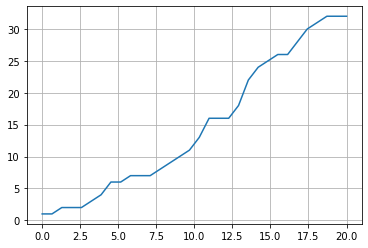

In [31]:
# Parameters
lam0 = 1
lam1 = 2
n = 20
tau_ = 10

# Plotting
T_ = point_process(lam0, lam1, tau_, n)
t = np.linspace(0, 20, len(T_))
N = []
for x in t:
    N.append(poisson(T_, x))
plt.plot(t, N)
plt.grid()
plt.show()

## Simulating a sample trajectory of Z

### Method: Rectangles: Newton Cotes of rank 1
If we partition each interval [$T_n, T_{n + 1}$] into $N$ subintervals with equal size, then we obtain points $(t_i)_{i = 0}^N$ where $t_{n,0} = T_N$, $t_{n,1} = T_n + \epsilon$, $t_{n,2} = T_n + 2 \epsilon$,...., $t_{n,k} = T_n + k \epsilon$ until $t_{n,N} = T_{n + 1}$, where $ \epsilon = \frac{T_{n + 1} - T_n}{N + 1}$
Then using this, we approximate the integral in the expression of Question 1 with the rectangles method, and we obtain: 
$ \forall k \in \{0, ..., N-2 \} $

$$ \hat{Z}(t_{n, k+1}) =  \hat{Z}(T_n) + \epsilon \sum_{l = 0}^{k} h(t_l) (1 - (\lambda_1 - \lambda_0) \hat{Z}(t_l))(1 - \hat{Z}(t_l)) $$

By developping the calculus, we find the induction relation:

$$ \hat{Z}(t_{n, k+1}) = \hat{Z}(t_{n, k}) + \epsilon h(t_{n, k})(1 - (\lambda_1 - \lambda_0) \hat{Z}(t_k))(1 - \hat{Z}(t_k)) $$


In [6]:
def generate_Z_hat(T, p, sigma, lam0, lam1):
    n = len(T)
    Z = np.zeros((n - 1, p))
    U = np.zeros((n - 1, p))
    
    # Initializastion: row 0
    eps =(T[1] - T[0]) / (p + 1)
    u = T[0]
    U[0, 0] = u
    for j in range(p - 1):
        Z[0, j + 1] = Z[0, j] + eps * (sigma - (lam1 - lam0) * Z[0, j]) * (1 - Z[0, j])
        u += eps
        U[0, j + 1] = u
        
    # parcourir les lignes [T_i, T_{i + 1}[
    for i in range(1, n - 1):
        eps =(T[i + 1] - T[i]) / (p + 1)
        u = T[i]
        U[i, 0] = u
        # computing the initial value with the transition expression (jump size)
        Z[i, 0] = Z[i - 1, p - 1] + ((lam1 - lam0) * Z[i - 1, p - 1] * (1 - Z[i - 1, p - 1])) / (lam0 + (lam1 - lam0) * Z[i - 1, p - 1])
        
        # computing Z[i, j]
        for j in range(p - 1):
            Z[i, j + 1] = Z[i, j] + eps * (sigma - (lam1 - lam0) * Z[i, j]) * (1 - Z[i, j])
            u += eps
            U[i , j + 1] = u
        
    return Z, U

## Plotting results

In [151]:
# Parameters
p = 200
lam0 = 10
lam1 = 20
sigma = 0.1
tau = np.random.exponential(scale = 1 / sigma)

# Simulating T and Z
T = point_process(lam0, lam1, tau, 500)
Z, U = generate_Z_hat(T, p, sigma, lam0, lam1)


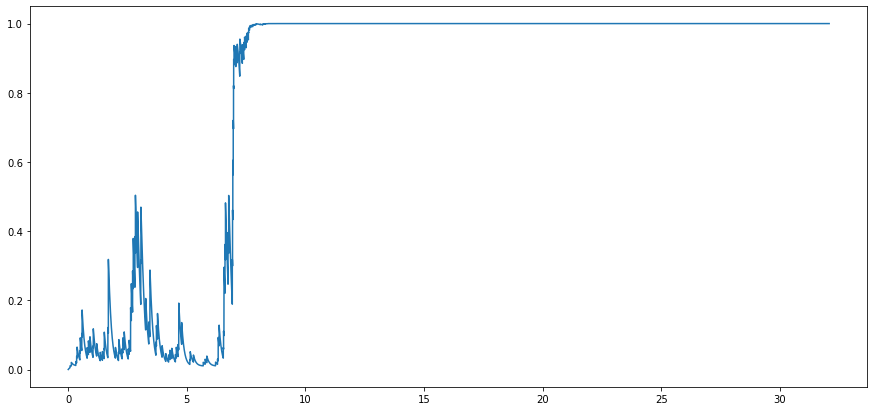

In [152]:
plt.figure(figsize = (15, 7))
Z_flat = Z.reshape(1, -1)[0]
U_flat = U.reshape(1, -1)[0]
plt.plot(U_flat, Z_flat)
plt.show()

In [153]:
print(tau)

6.331328348035505


In [154]:
# Estimation of tau
def estimation(Z, U, tau):
    # We will return the value in U for which the proba is close to 1
    n = closest(0.99, Z)
    return U[n]

In [155]:
print(estimation(Z_flat, U_flat, tau))

7.642056128555179


## Remarques:

- Si $\lambda_0$ et $\sigma$ sont très éloignés, alors on n'a pas besoin de beaucoup de points pour estimer $\tau$.

## Question 4

We have that:
$$ \hat{Z}(t) = \mathbb{E}[\mathbb{1}_{ \tau \leq t} | \mathcal{F}_t] $$

$$ \mathbb{E}[\hat{Z}(t)] = \mathbb{P}[\tau \leq t] $$ 
Then we do the Monte-Carlo estimation of this expectation, and we find the time $t$ for which we move from 0 to 1.

In [11]:
def closest(t, T):
    if t > T[-1]:
        return len(T) - 1
    
    idx = 0
    while T[idx + 1] < t:
        idx += 1
    return idx     

In [12]:
def Z_hat(t, Z, T, p):
    
    # We need to find the T_n such that t is in [T_n, T_{n + 1}]
    n = closest(t, T)
    z = Z[n, 0]
    
    # Computing the integral with the method of rectangles
    eps =(t - T[n]) / p
    for j in range(p - 1):
        z += eps * (sigma - (lam1 - lam0) * z) * (1 - z)
    return z

In [13]:
# The estimator of tau
def tau_estimation(t, n, tau, lam0, lam1, sigma, p, N):
    """ N is the number of all points of the Poisson Process with the second intensity
        n : the integer in the Monte-Carlo estimation
    """
    z_mean = 0
    for i in range(n):
        T = point_process(lam0, lam1, tau, N)
        Z, U = generate_Z_hat(T, p, sigma, lam0, lam1)
        z_mean += Z_hat(t, Z, T, p)
    return z_mean / n


In [156]:
print(tau)

6.331328348035505


In [ ]:
# Parameters
#t = 0.3
n = 1000
N = 50
p = 200

# Do we dare ?
#res = tau_estimation(t, n , tau, lam0, lam1, sigma, p, N)
t = np.linspace(0, 8, 20)
plt.figure(figsize = (12, 7))
values = [tau_estimation(r, n , tau, lam0, lam1, sigma, p, N) for r in t]
plt.plot(t, values)
plt.show()
#print(tau_estimation(t, n , tau, lam0, lam1, sigma, p, N))